In [1]:
from pyDeepInsight import ImageTransformer, LogScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
import pandas as pd
import numpy as np
from sklearn import metrics

import tensorflow.keras

from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras import optimizers
from tensorflow.keras.utils import to_categorical

from sklearn.metrics import classification_report
from scipy import linalg as scipy_linalg
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, classification_report, plot_confusion_matrix
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier

import itertools


In [2]:
prosody_data = pd.read_csv('Prosodic_Features_MRH.csv',sep=",")
#prosody_data = pd.read_csv('prosodic_features_M2.csv',sep=",")

#expr = pd.read_csv(expr_file, sep="\t")
y = prosody_data['Hired3C'].values
#36
#X =prosody_data[['duration', 'energy', 'power', 'min_pitch', 'max_pitch', 'mean_pitch', 'pitch_sd', 'pitch_abs', 'pitch_quant', 'pitchUvsVRatio', 'Time:8', 'iDifference', 'diffPitchMaxMin', 'diffPitchMaxMean', 'diffPitchMaxMode', 'intensityMin', 'intensityMax', 'intensityMean', 'intensitySD', 'intensityQuant', 'diffIntMaxMin', 'diffIntMaxMean', 'diffIntMaxMode', 'avgVal1', 'avgVal2', 'avgVal3', 'avgBand1', 'avgBand2', 'avgBand3', 'fmean1', 'fmean2', 'fmean3', 'f2meanf1', 'f3meanf1', 'f1STD', 'f2STD']]
#49X =prosody_data[['duration', 'energy', 'power', 'min_pitch', 'max_pitch', 'mean_pitch', 'pitch_sd', 'pitch_abs', 'pitch_quant', 'pitchUvsVRatio', 'Time:8', 'iDifference', 'diffPitchMaxMin', 'diffPitchMaxMean', 'diffPitchMaxMode', 'intensityMin', 'intensityMax', 'intensityMean', 'intensitySD', 'intensityQuant', 'diffIntMaxMin', 'diffIntMaxMean', 'diffIntMaxMode', 'avgVal1', 'avgVal2', 'avgVal3', 'avgBand1', 'avgBand2', 'avgBand3', 'fmean1', 'fmean2', 'fmean3', 'f2meanf1', 'f3meanf1', 'f1STD', 'f2STD', 'f3STD', 'f2STDf1', 'f2STDf2', 'jitter', 'shimmer', 'jitterRap', 'meanPeriod', 'percentUnvoiced', 'numVoiceBreaks', 'PercentBreaks', 'speakRate', 'numPause', 'maxDurPause']]
#25X = prosody_data[['pitch_quant', 'meanPeriod', 'mean_pitch', 'fmean3', 'f3STD', 'f2STD', 'pitch_sd', 'shimmer', 'avgBand2', 'intensityMean', 'jitter', 'intensitySD', 'intensityQuant', 'jitterRap', 'f1STD', 'avgVal2', 'fmean2', 'PercentBreaks', 'AvgTotFall:3', 'f2STDf1', 'pitch_abs', 'f2STDf2', 'avgBand1', 'percentUnvoiced', 'AvgTotRis:3']]
#For MRH X = prosody_data.iloc[:, 6:].values
#For M2
X = prosody_data.iloc[:, 6:].values

X = StandardScaler().fit_transform(X)
#X = MinMaxScaler().fit_transform(X)

In [3]:
from sklearn.decomposition import PCA
pca = PCA(n_components=5)
pca.fit(X)
X_pca = pca.transform(X)
principalDf = pd.DataFrame(data = X_pca , columns = ['PC1', 'PC2','PC3', 'PC4','PC5'])
principalDf

,PC1,PC2,PC3,PC4,PC5
0,-4.168954,-0.014177,-2.475345,-0.810886,0.158392
1,-4.464238,-1.009904,-3.092034,-1.055292,0.230522
2,-3.358534,0.101685,-2.585497,0.410778,1.336424
3,0.865701,-2.990583,-3.409886,3.427491,1.778390
4,1.506023,-3.118672,-3.273642,1.326753,1.733804
...,...,...,...,...,...
675,-1.722865,0.621413,-2.511901,3.169306,-2.441882
676,-2.157176,0.879941,-2.401855,1.721034,-2.208043
677,-2.407032,2.363606,-1.592129,4.621724,-3.687426
678,-0.943823,3.709886,-0.265405,3.604097,-0.754180


In [4]:
print('Variance of each component:', pca.explained_variance_ratio_)
print('\n Total Variance Explained:', round(sum(list(pca.explained_variance_ratio_))*100, 10))

Variance of each component: [0.22143425 0.16851797 0.09213142 0.08800173 0.06151173]

 Total Variance Explained: 63.1597094239


In [5]:
finalDf = pd.concat([principalDf, prosody_data[['Hired3C']]], axis = 1)
finalDf

,PC1,PC2,PC3,PC4,PC5,Hired3C
0,-4.168954,-0.014177,-2.475345,-0.810886,0.158392,1
1,-4.464238,-1.009904,-3.092034,-1.055292,0.230522,1
2,-3.358534,0.101685,-2.585497,0.410778,1.336424,1
3,0.865701,-2.990583,-3.409886,3.427491,1.778390,1
4,1.506023,-3.118672,-3.273642,1.326753,1.733804,1
...,...,...,...,...,...,...
675,-1.722865,0.621413,-2.511901,3.169306,-2.441882,0
676,-2.157176,0.879941,-2.401855,1.721034,-2.208043,0
677,-2.407032,2.363606,-1.592129,4.621724,-3.687426,0
678,-0.943823,3.709886,-0.265405,3.604097,-0.754180,0


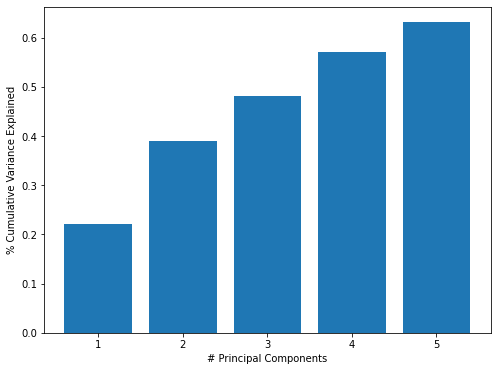

In [6]:
cum_exp_var = []
var_exp = 0
for i in pca.explained_variance_ratio_:
    var_exp += i
    cum_exp_var.append(var_exp)

# Plot cumulative explained variance for all PCs

fig, ax = plt.subplots(figsize=(8,6))
ax.bar(range(1,6), cum_exp_var)
ax.set_xlabel('# Principal Components')
ax.set_ylabel('% Cumulative Variance Explained');

In [7]:
def CreateModel(X_train, X_test, y_train, y_test):
    no_of_hiddenLayerNeurons = 80
    no_of_inNeurons = 5
    no_of_epochs = 50
    
    #Classifier 
    def baseline_model():
        # create model
        model = Sequential()
        model.add(Dense(no_of_hiddenLayerNeurons, input_dim=no_of_inNeurons, activation='relu'))
        model.add(Dense(no_of_hiddenLayerNeurons, input_dim=no_of_inNeurons, activation='relu'))
        model.add(Dense(no_of_hiddenLayerNeurons, input_dim=no_of_inNeurons, activation='relu'))
        model.add(Dense(no_of_hiddenLayerNeurons, input_dim=no_of_inNeurons, activation='relu'))
        model.add(Dense(no_of_hiddenLayerNeurons, input_dim=no_of_inNeurons, activation='relu'))
        model.add(Dense(1, activation='sigmoid'))      
        # Compile model
        model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
        return model
    
    
    y_21_test = []
    for i in y_test:
        if(i == 2):
            y_21_test.append(2)
        else:
            y_21_test.append(1)

    y_21_train = []
    for i in y_train:
        if(i == 2):
            y_21_train.append(2)
        else:
            y_21_train.append(1)

    
    X = X_train.values
    y = y_21_train
    
      
    #Classifier
    estimator = KerasClassifier(baseline_model, epochs=no_of_epochs, batch_size=5, verbose=0)
    estimator.fit(X, y)
    estimator.score(X, y)
    y_21_predict=estimator.predict(X_test)
    
    target_names = ['class 2', 'class 1']      
    print(classification_report(y_21_test,y_21_predict,target_names=target_names, zero_division=0))

    X_10_train = X_train.loc[y_train!= 2]
    X_10_test = X_test.loc[y_test!= 2]

    #select from y_train where y value is not 2
    y_10_train= []
    for i in y_train:
        if(i != 2):
            y_10_train.append(i)

    #select from y_test where y value is not 2
    y_10_test = []
    for i in y_test:
        if(i != 2):
            y_10_test.append(i)

    X = X_10_train.values
    y = y_10_train
    
        
    #Classifier 
    estimator = KerasClassifier(baseline_model, epochs=no_of_epochs, batch_size=5, verbose=0)
    estimator.fit(X, y)
    estimator.score(X, y)
    y_10_predict = estimator.predict(X_10_test)
    target_names = ['class 1', 'class 0']      
    print(classification_report(y_10_test,y_10_predict ,target_names=target_names, zero_division=0))

    y1=list(y_test)
    y2=list(y_21_predict)
    y3=list(y_10_predict)
    combined_Predictions = []
    k=0
    for (i,j) in zip(y1,y2):
        if(i!=2):
            combined_Predictions.append(y3[k])
            k=k+1
        else:
            combined_Predictions.append(j)
    #target_names = ['class 0', 'class 1', 'class 2']
    #print(classification_report(y_test,combined_Predictions ,target_names=target_names, zero_division=0))
    acc = accuracy_score(y_test, combined_Predictions, normalize=True)
    
    target_names = ['class 0', 'class 1', 'class 2']
    print(classification_report(y_test,combined_Predictions ,target_names=target_names, zero_division=0))
    acc = accuracy_score(y_test, combined_Predictions, normalize=True)

    print('MSE',metrics.mean_squared_error(y_test,combined_Predictions))

    plt.figure(figsize = (10,6))
    sns.heatmap(confusion_matrix(y_test, combined_Predictions), annot = True,fmt='d')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()
    return acc 


Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
              precision    recall  f1-score   support

     class 2       0.91      0.91      0.91        46
     class 1       0.82      0.82      0.82        22

    accuracy                           0.88        68
   macro avg       0.87      0.87      0.87        68
weighted avg       0.88      0.88      0.88        68

              precision    recall  f1-score   support

     class 1       0.92      0.96      0.94        23
     class 0       0.95      0.91      0.93        23

    accuracy                           0.93        46
   macro avg       0.94      0.93      0.93        46
weighted avg       0.94      0.93      0.93        46

            

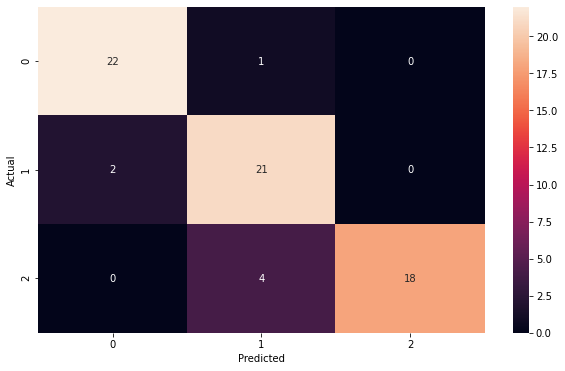

              precision    recall  f1-score   support

     class 2       0.98      0.89      0.93        46
     class 1       0.81      0.95      0.88        22

    accuracy                           0.91        68
   macro avg       0.89      0.92      0.90        68
weighted avg       0.92      0.91      0.91        68

              precision    recall  f1-score   support

     class 1       0.96      0.96      0.96        23
     class 0       0.96      0.96      0.96        23

    accuracy                           0.96        46
   macro avg       0.96      0.96      0.96        46
weighted avg       0.96      0.96      0.96        46

              precision    recall  f1-score   support

     class 0       0.96      0.96      0.96        23
     class 1       0.92      0.96      0.94        23
     class 2       1.00      0.95      0.98        22

    accuracy                           0.96        68
   macro avg       0.96      0.96      0.96        68
weighted avg       0

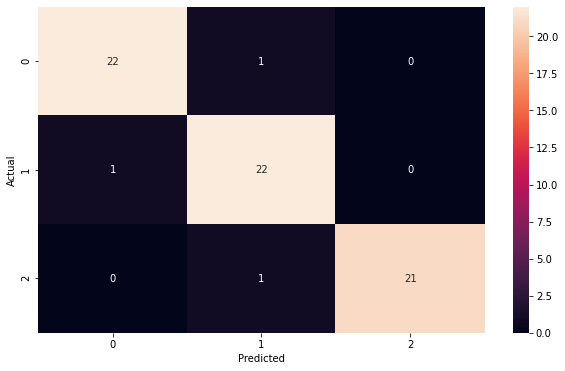

              precision    recall  f1-score   support

     class 2       0.92      0.96      0.94        46
     class 1       0.90      0.82      0.86        22

    accuracy                           0.91        68
   macro avg       0.91      0.89      0.90        68
weighted avg       0.91      0.91      0.91        68

              precision    recall  f1-score   support

     class 1       1.00      1.00      1.00        23
     class 0       1.00      1.00      1.00        23

    accuracy                           1.00        46
   macro avg       1.00      1.00      1.00        46
weighted avg       1.00      1.00      1.00        46

              precision    recall  f1-score   support

     class 0       1.00      1.00      1.00        23
     class 1       0.85      1.00      0.92        23
     class 2       1.00      0.82      0.90        22

    accuracy                           0.94        68
   macro avg       0.95      0.94      0.94        68
weighted avg       0

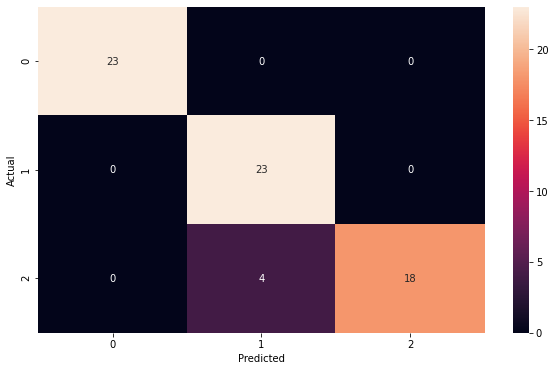

              precision    recall  f1-score   support

     class 2       0.89      0.89      0.89        46
     class 1       0.77      0.77      0.77        22

    accuracy                           0.85        68
   macro avg       0.83      0.83      0.83        68
weighted avg       0.85      0.85      0.85        68

              precision    recall  f1-score   support

     class 1       0.92      1.00      0.96        23
     class 0       1.00      0.91      0.95        23

    accuracy                           0.96        46
   macro avg       0.96      0.96      0.96        46
weighted avg       0.96      0.96      0.96        46

              precision    recall  f1-score   support

     class 0       0.92      1.00      0.96        23
     class 1       0.81      0.91      0.86        23
     class 2       1.00      0.77      0.87        22

    accuracy                           0.90        68
   macro avg       0.91      0.90      0.90        68
weighted avg       0

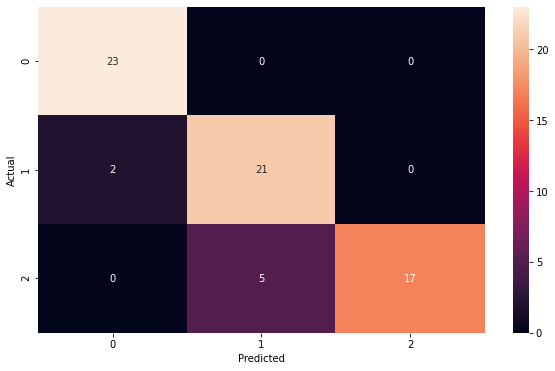

              precision    recall  f1-score   support

     class 2       0.90      0.96      0.93        46
     class 1       0.89      0.77      0.83        22

    accuracy                           0.90        68
   macro avg       0.90      0.86      0.88        68
weighted avg       0.90      0.90      0.89        68

              precision    recall  f1-score   support

     class 1       0.91      0.91      0.91        23
     class 0       0.91      0.91      0.91        23

    accuracy                           0.91        46
   macro avg       0.91      0.91      0.91        46
weighted avg       0.91      0.91      0.91        46

              precision    recall  f1-score   support

     class 0       0.91      0.91      0.91        23
     class 1       0.75      0.91      0.82        23
     class 2       1.00      0.77      0.87        22

    accuracy                           0.87        68
   macro avg       0.89      0.87      0.87        68
weighted avg       0

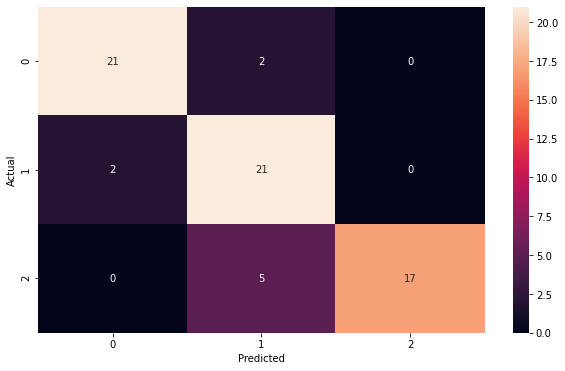

              precision    recall  f1-score   support

     class 2       0.96      0.96      0.96        45
     class 1       0.91      0.91      0.91        23

    accuracy                           0.94        68
   macro avg       0.93      0.93      0.93        68
weighted avg       0.94      0.94      0.94        68

              precision    recall  f1-score   support

     class 1       1.00      0.96      0.98        23
     class 0       0.96      1.00      0.98        22

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45

              precision    recall  f1-score   support

     class 0       1.00      0.96      0.98        23
     class 1       0.88      1.00      0.94        22
     class 2       1.00      0.91      0.95        23

    accuracy                           0.96        68
   macro avg       0.96      0.96      0.96        68
weighted avg       0

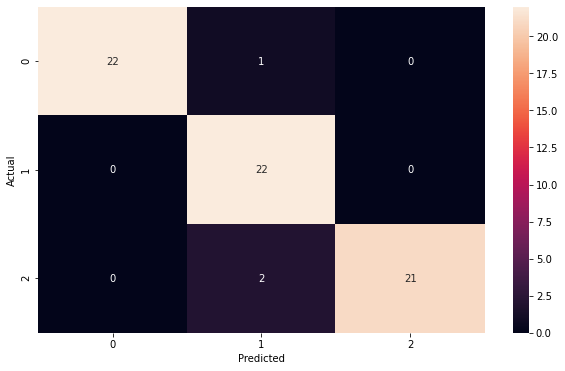

              precision    recall  f1-score   support

     class 2       0.93      0.89      0.91        45
     class 1       0.80      0.87      0.83        23

    accuracy                           0.88        68
   macro avg       0.87      0.88      0.87        68
weighted avg       0.89      0.88      0.88        68

              precision    recall  f1-score   support

     class 1       0.92      0.96      0.94        23
     class 0       0.95      0.91      0.93        22

    accuracy                           0.93        45
   macro avg       0.93      0.93      0.93        45
weighted avg       0.93      0.93      0.93        45

              precision    recall  f1-score   support

     class 0       0.92      0.96      0.94        23
     class 1       0.83      0.91      0.87        22
     class 2       1.00      0.87      0.93        23

    accuracy                           0.91        68
   macro avg       0.92      0.91      0.91        68
weighted avg       0

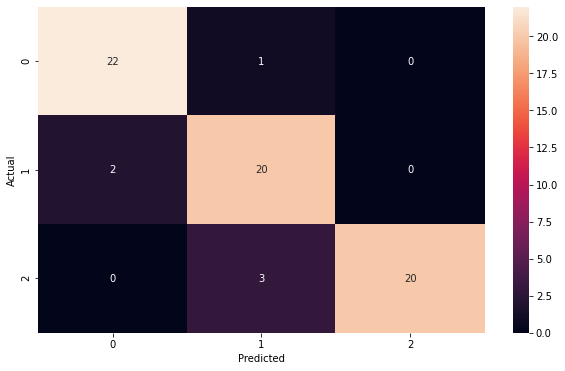

              precision    recall  f1-score   support

     class 2       0.93      0.89      0.91        45
     class 1       0.80      0.87      0.83        23

    accuracy                           0.88        68
   macro avg       0.87      0.88      0.87        68
weighted avg       0.89      0.88      0.88        68

              precision    recall  f1-score   support

     class 1       0.96      1.00      0.98        23
     class 0       1.00      0.95      0.98        22

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45

              precision    recall  f1-score   support

     class 0       0.96      1.00      0.98        23
     class 1       0.88      0.95      0.91        22
     class 2       1.00      0.87      0.93        23

    accuracy                           0.94        68
   macro avg       0.94      0.94      0.94        68
weighted avg       0

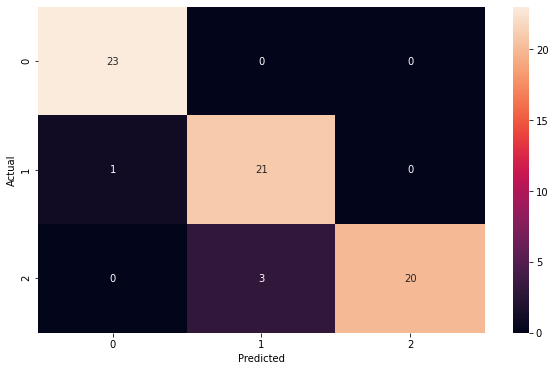

              precision    recall  f1-score   support

     class 2       0.85      0.91      0.88        45
     class 1       0.80      0.70      0.74        23

    accuracy                           0.84        68
   macro avg       0.83      0.80      0.81        68
weighted avg       0.84      0.84      0.84        68

              precision    recall  f1-score   support

     class 1       1.00      1.00      1.00        23
     class 0       1.00      1.00      1.00        22

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

              precision    recall  f1-score   support

     class 0       1.00      1.00      1.00        23
     class 1       0.76      1.00      0.86        22
     class 2       1.00      0.70      0.82        23

    accuracy                           0.90        68
   macro avg       0.92      0.90      0.89        68
weighted avg       0

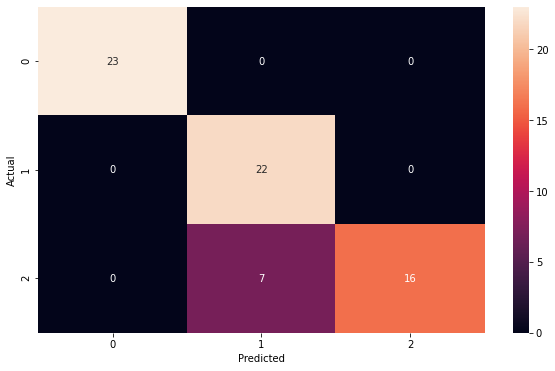

              precision    recall  f1-score   support

     class 2       0.91      0.93      0.92        45
     class 1       0.86      0.83      0.84        23

    accuracy                           0.90        68
   macro avg       0.89      0.88      0.88        68
weighted avg       0.90      0.90      0.90        68

              precision    recall  f1-score   support

     class 1       0.96      0.96      0.96        23
     class 0       0.95      0.95      0.95        22

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45

              precision    recall  f1-score   support

     class 0       0.96      0.96      0.96        23
     class 1       0.81      0.95      0.88        22
     class 2       1.00      0.83      0.90        23

    accuracy                           0.91        68
   macro avg       0.92      0.91      0.91        68
weighted avg       0

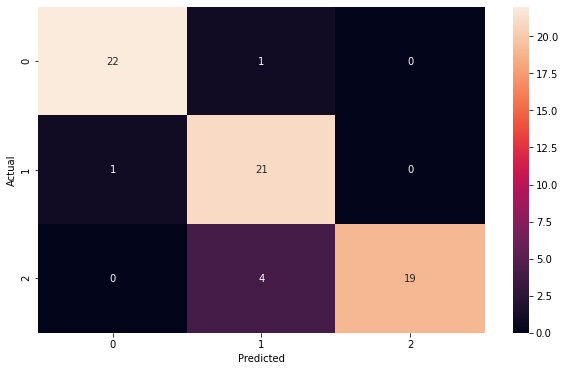

[0.8970588235294118, 0.9558823529411765, 0.9411764705882353, 0.8970588235294118, 0.8676470588235294, 0.9558823529411765, 0.9117647058823529, 0.9411764705882353, 0.8970588235294118, 0.9117647058823529]
CV Score: 91.76% (+/- 2.81%)


In [8]:
skf = StratifiedKFold(n_splits=10,shuffle=True, random_state=12)
cvscores =[]
#X= finalDf[['PC1', 'PC2','PC3', 'PC4','PC5', 'PC6','PC7', 'PC8','PC9', 'PC10','PC11', 'PC12','PC13', 'PC14','PC15', 'PC16','PC17', 'PC18','PC19', 'PC20','PC21', 'PC22','PC23', 'PC24','PC25']]
X= finalDf[['PC1', 'PC2','PC3', 'PC4','PC5']]
y=finalDf['Hired3C']
#
for train_index, test_index in skf.split(X, y):

    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    #print("X_train:", X_train.values, "X_test", X_test)
    #print("y_train:", y_train, "y_test", y_test)
    
    scores = CreateModel(X_train, X_test, y_train, y_test)
    
    cvscores.append(scores)
print(cvscores ) 
print("CV Score: %.2f%% (+/- %.2f%%)" % (np.mean(cvscores)*100, np.std(cvscores)*100))
